# Crazy Corporation Credit Fraud detection
Below we are going to start the preprocessing of data and implementation of a Logical regression model.

## Imported libraries
Below is the libraries necessary for this project. This is ran in a virtual environment sperate from system environments.

In [56]:
#importation of libraries needed for the project
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Data importation and preprocessing
This section will be dedicated to data importation and preprocessing. 

In [57]:
#import csv with data into a pandas DataFrame
df = pd.read_csv("./src/testdata/creditcard.csv")
df.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Time is an irrelavent factor due to each being subsequent transactions that occur cronoligically. v1-v28 is scaled and amount is not. Class is our classification variable. It will denote fraud by a 1 and non-fraud by a 0. This means that the logistic regression model will be binomial.

In [58]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


So descriptions of the data including means, quartile values, mins, maxes, and standard deviations.

Below there is a check for null values amongst the data.

In [59]:
print(f"Number of null cells: {df.isnull().sum().max()}")

Number of null cells: 0


No NULL values are present in the dataset. No need for a section handling that type of data.

Checking the dataset for the percentages of each class. In this case which transactions are non-fraud (0) and fraud (1).

In [60]:
print(f"Not Fraud percent:{round(df['Class'].value_counts()[0]/len(df) * 100 ,2)}")
print(f"Fraud percent:{round(df['Class'].value_counts()[1]/len(df) * 100 ,2)}")

Not Fraud percent:99.83
Fraud percent:0.17


Extreme disparity between each type of transaction. This will require a random undersampling of non-fraud data to resolve this imbalance. 

Visualize the difference in actual volume using a count plot. Red is 0, or non-fraud, and 1 is fraud.

<Axes: xlabel='Class', ylabel='count'>

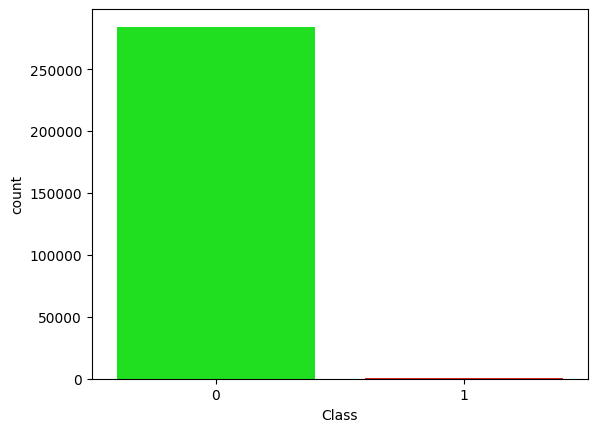

In [61]:
colors = ["#00FF00", "#FF0000"]

sns.countplot( x=df['Class'],data=df, palette=colors)

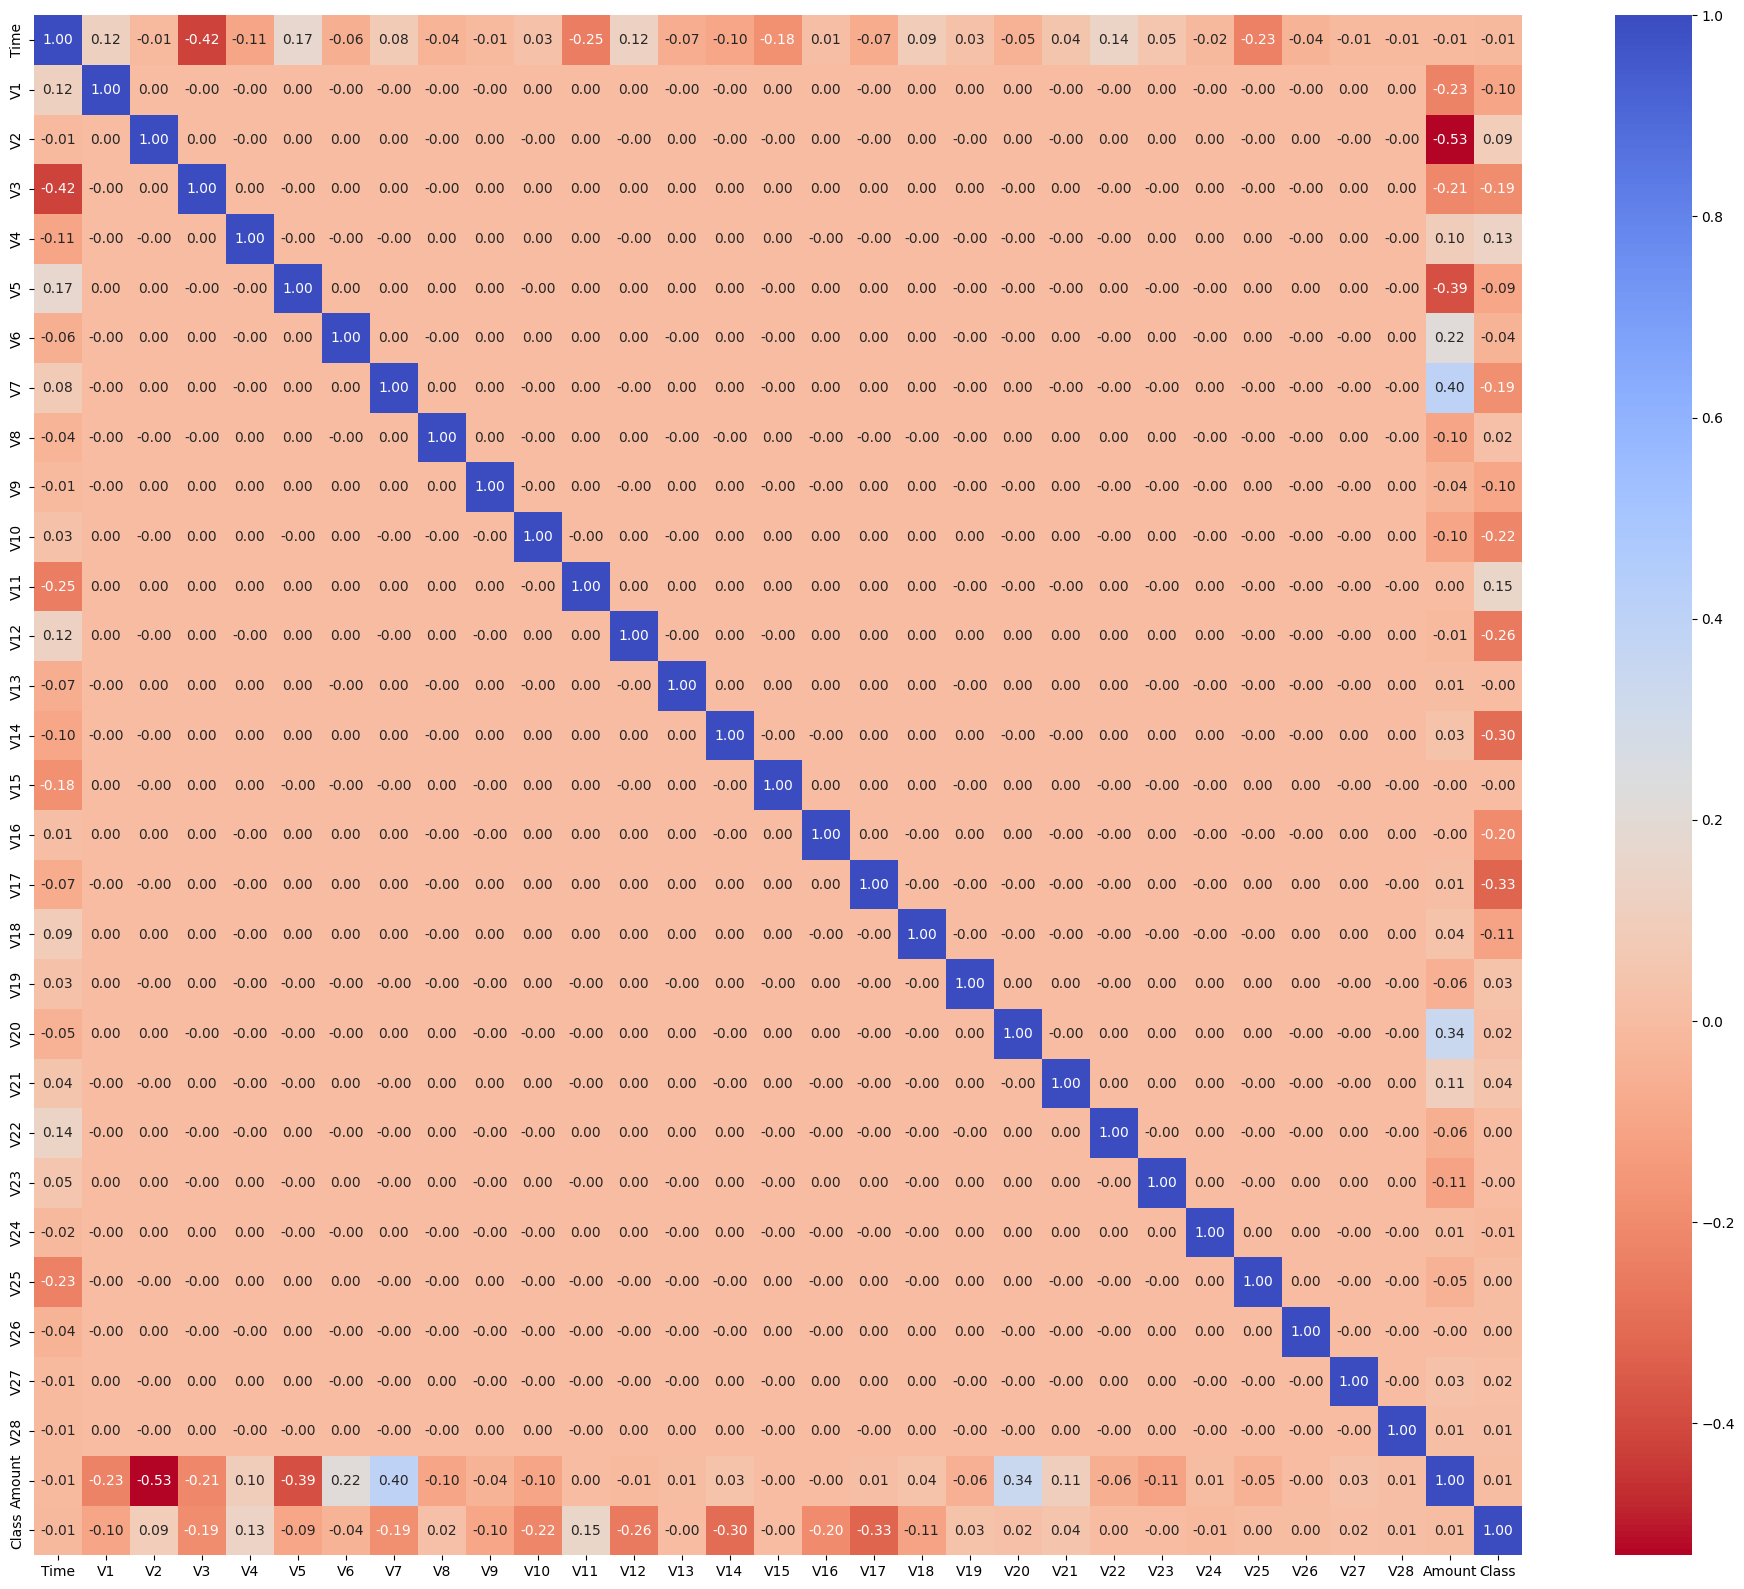

In [62]:
#Heatmap of the unbalanced data post scaling
f, ax1 = plt.subplots(figsize=(24,20))
correlation = df.corr()
sns.heatmap(correlation, cmap='coolwarm_r',ax=ax1,  fmt=".2f", annot=True)
plt.show()

## Balancing data

In [63]:
#sample dataframe for 100% of data 
df = df.sample(frac=1)

#create seperate dataframe for both fraud and non-fraud (Limited to the same size as fraud)
df_fraud = df.loc[df["Class"] == 1]
df_not_fraud = df.loc[df["Class"] == 0][:len(df_fraud)]

#Concatenating data and resampling using an arbitrary randome seed (in this case 67) 
df_balanced_unshuffled = pd.concat([df_fraud,df_not_fraud])
df_balanced_shuffled = df_balanced_unshuffled.sample(frac=1,random_state=67)

#Display new dataframe
df_balanced_shuffled.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
47435,43210.0,1.169520,0.300872,0.909529,1.187631,-0.675052,-0.925282,-0.017851,-0.164198,0.073070,...,-0.157355,-0.453234,0.137070,0.692002,0.272732,-0.646810,0.039610,0.041111,14.99,0
42490,41124.0,-0.318863,1.059649,-0.271283,0.991245,-0.119549,-0.644336,0.720344,0.365107,-0.484984,...,0.227786,0.577402,0.286915,0.036732,-0.784825,-0.380314,0.295422,0.166836,75.56,0
232137,147057.0,1.911472,-0.269405,-0.281007,0.464521,-0.570458,0.154203,-1.108208,0.300881,0.944951,...,0.239002,0.751896,0.265705,0.628296,-0.567116,0.254052,0.028765,-0.005646,6.68,0
168455,119231.0,2.120982,-0.789102,-1.434734,-0.872339,-0.380803,-0.080581,-1.060672,0.119660,-0.115421,...,0.252594,0.707011,0.056151,0.084922,-0.107009,-0.108414,0.014957,-0.018663,29.95,0
268600,163298.0,0.131215,0.934596,-0.477156,-0.550323,0.879453,-0.796673,0.925227,-0.054161,0.093822,...,-0.353888,-0.929788,0.111730,0.447535,-0.432972,0.121823,0.213412,0.082148,9.99,0
42590,41164.0,-5.932778,4.571743,-9.427247,6.577056,-6.115218,-3.661798,-10.894079,3.709210,-5.859524,...,2.014272,-0.167417,0.049968,0.384430,-0.077884,0.565493,1.792012,0.371007,5.30,1
149773,91898.0,-1.498067,2.451272,-1.783468,1.698102,0.040985,-1.799932,-1.549564,0.273845,-0.736819,...,0.501894,0.312202,-0.672181,-0.300648,1.020633,0.213002,0.633793,0.383434,1.00,0
264822,161607.0,-1.118860,0.990250,-0.340368,4.408445,1.662971,0.665627,0.348467,0.563650,-2.357818,...,0.064896,0.483421,0.696358,0.199628,-0.277469,0.397285,0.306745,0.100009,4.53,0
113747,73187.0,1.145797,-0.045911,0.854179,1.239242,-0.534672,0.263550,-0.429373,0.177536,0.601035,...,-0.009856,0.250930,-0.170622,0.048571,0.697291,-0.275047,0.055565,0.014727,10.00,0
204064,135095.0,0.232512,0.938944,-4.647780,3.079844,-1.902655,-1.041408,-1.020407,0.547069,-1.105990,...,0.911373,1.042929,0.999394,0.901260,-0.452093,0.192959,0.180859,-0.029315,345.00,1


## 

<Axes: xlabel='Class', ylabel='count'>

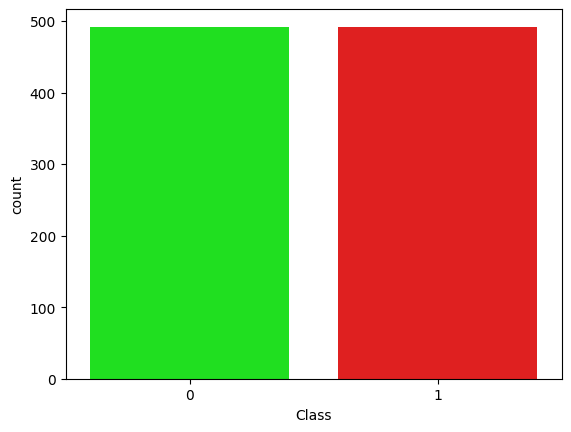

In [64]:
#Colors associated with different classes
colors = ["#00FF00", "#FF0000"]

#countplot that displays balanced data counts based on class
sns.countplot( x=df_balanced_shuffled['Class'],data=df_balanced_shuffled, palette=colors)

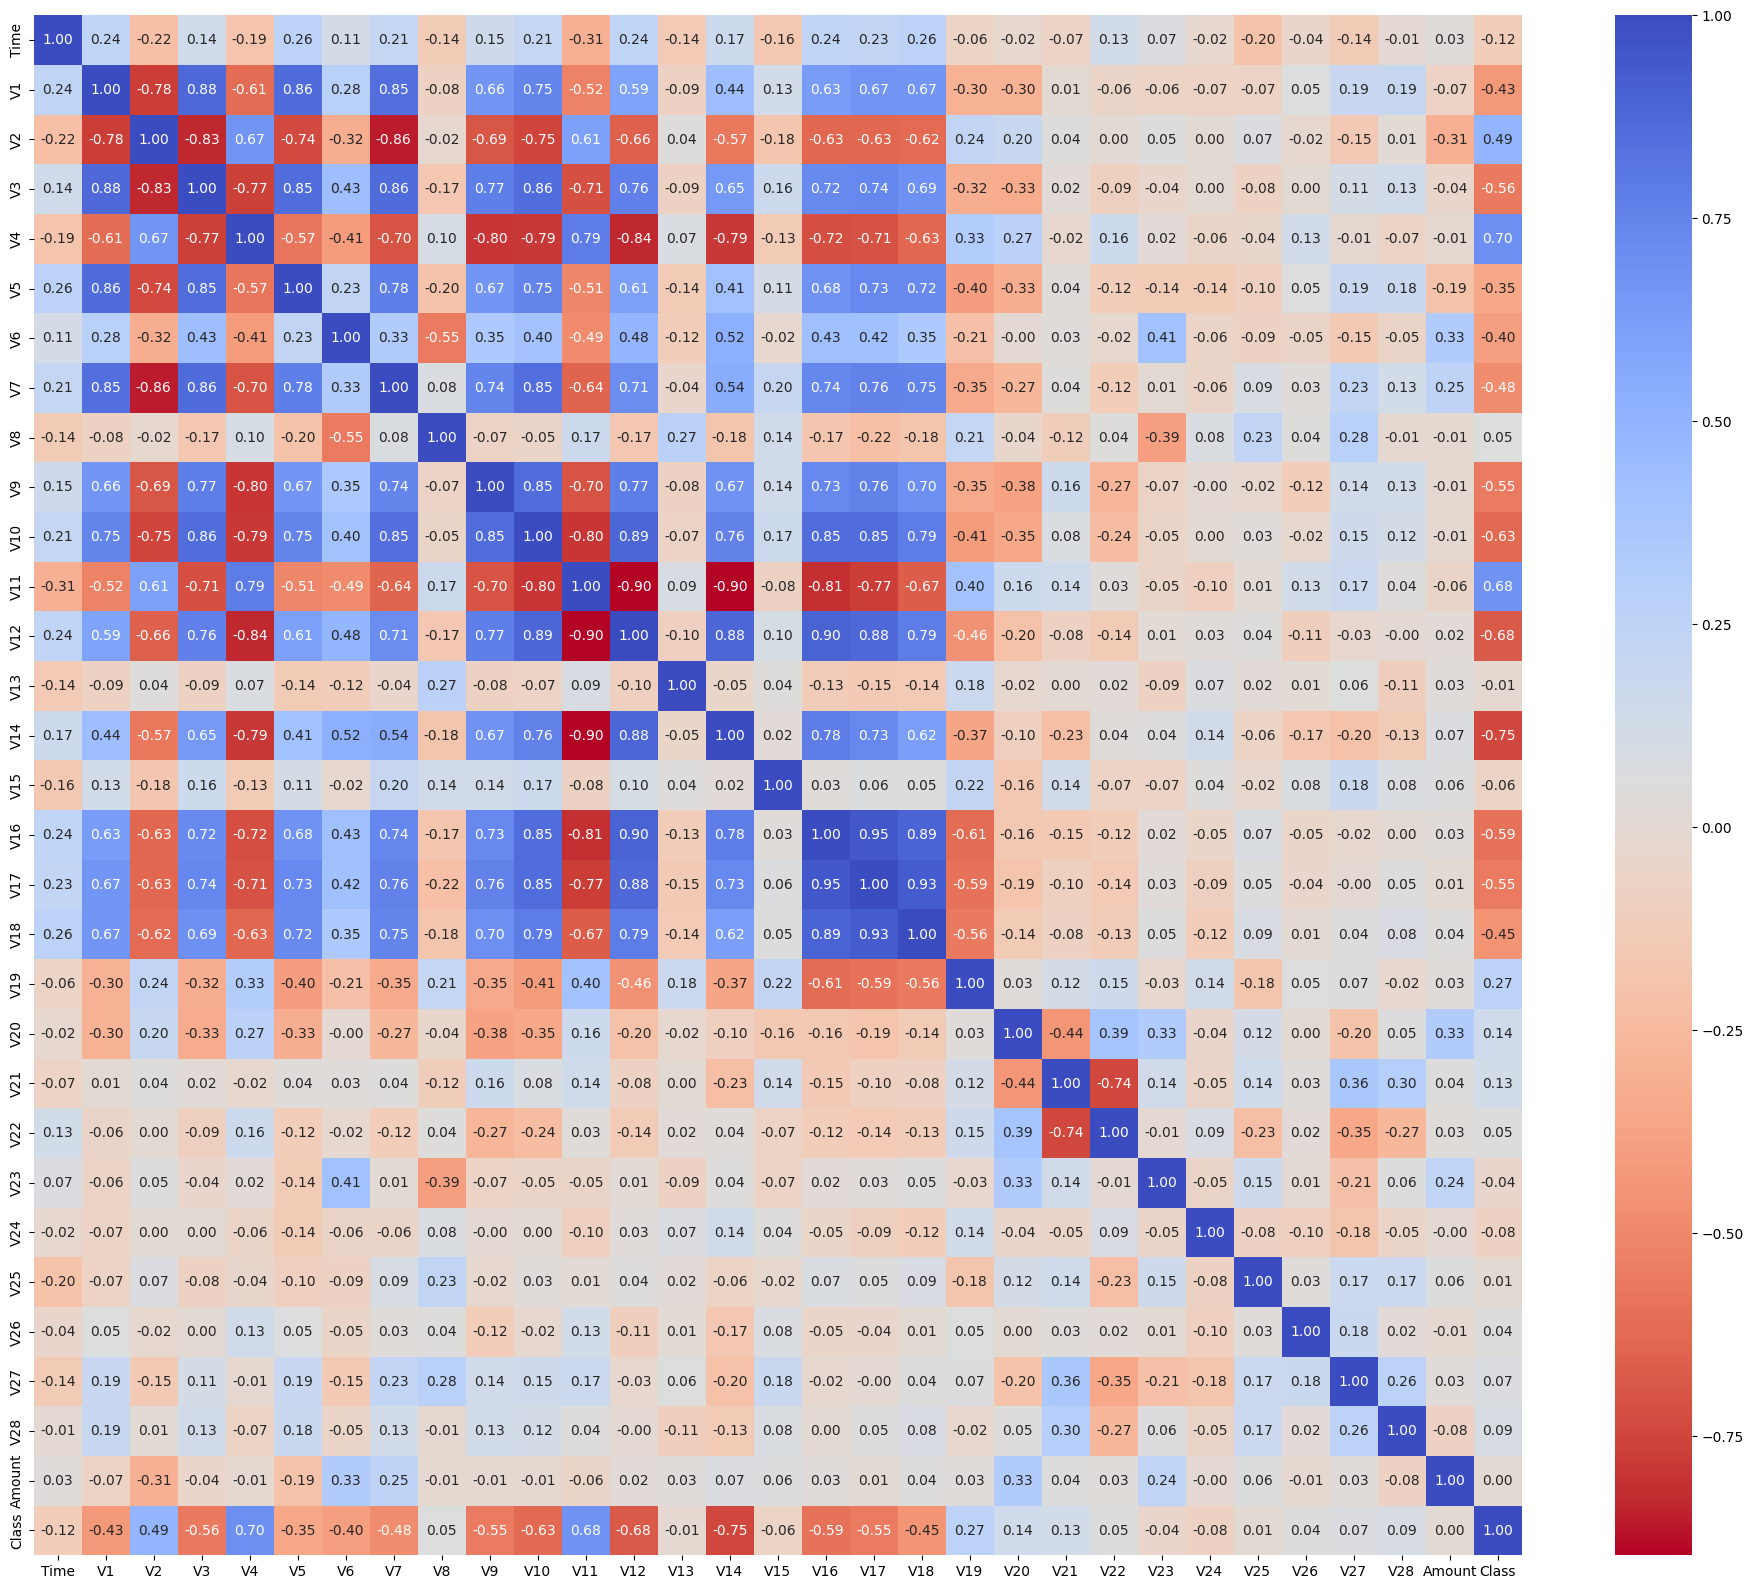

In [65]:
#Heatmap of balanced data
fig, ax1 = plt.subplots(figsize=(24,20))
correlation = df_balanced_shuffled.corr()
sns.heatmap(correlation, cmap='coolwarm_r',ax=ax1, fmt=".2f", annot=True)
plt.show()

There is a negative correlation between Class (Classifier) and v14, v12, v16, v10 and a positive correlation for features v4, v11, v2

negative correlations:

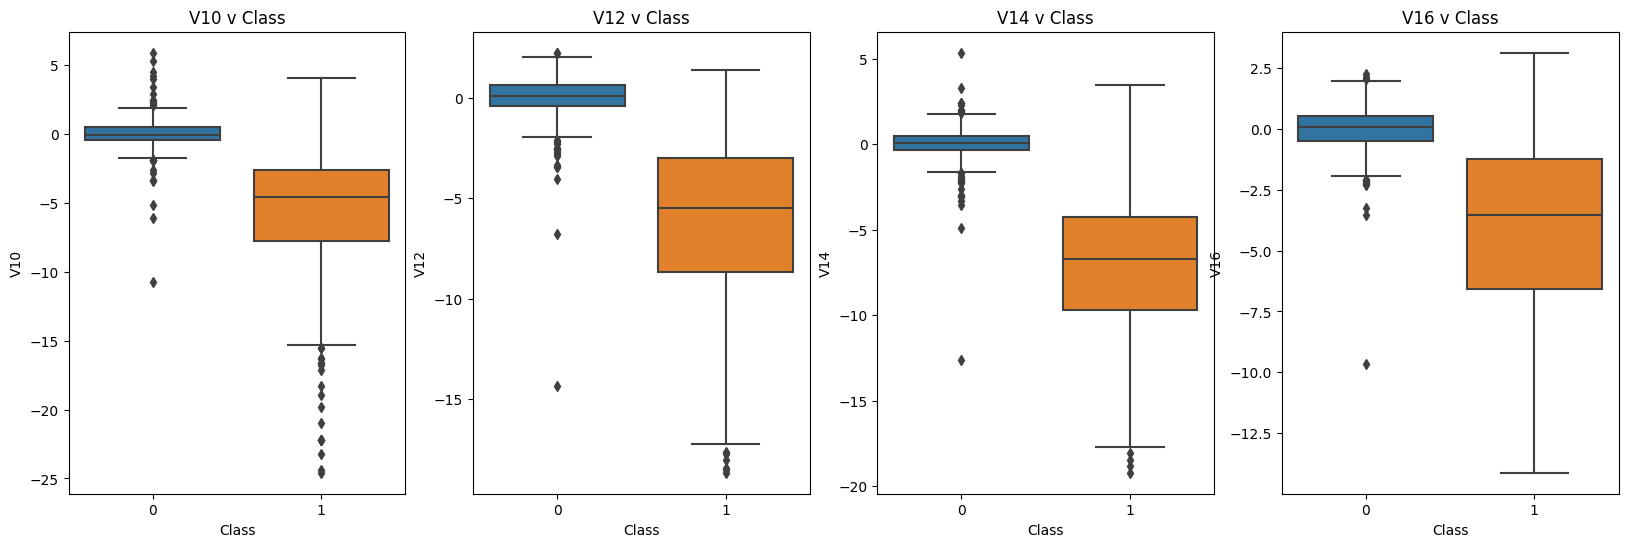

In [66]:
#Figure and number of slots
fig, axes = plt.subplots(ncols=4, figsize=(20,6))

#V10 boxplot
sns.boxplot(x="Class", y="V10", data=df_balanced_shuffled, ax=axes[0])
axes[0].set_title("V10 v Class")

#V12 boxplot
sns.boxplot(x="Class", y="V12", data=df_balanced_shuffled, ax=axes[1])
axes[1].set_title("V12 v Class")

#V14 boxplot
sns.boxplot(x="Class", y="V14", data=df_balanced_shuffled, ax=axes[2])
axes[2].set_title("V14 v Class")

#V16 Boxplot
sns.boxplot(x="Class", y="V16", data=df_balanced_shuffled, ax=axes[3])
axes[3].set_title("V16 v Class")


plt.show()

Positive Correlations:

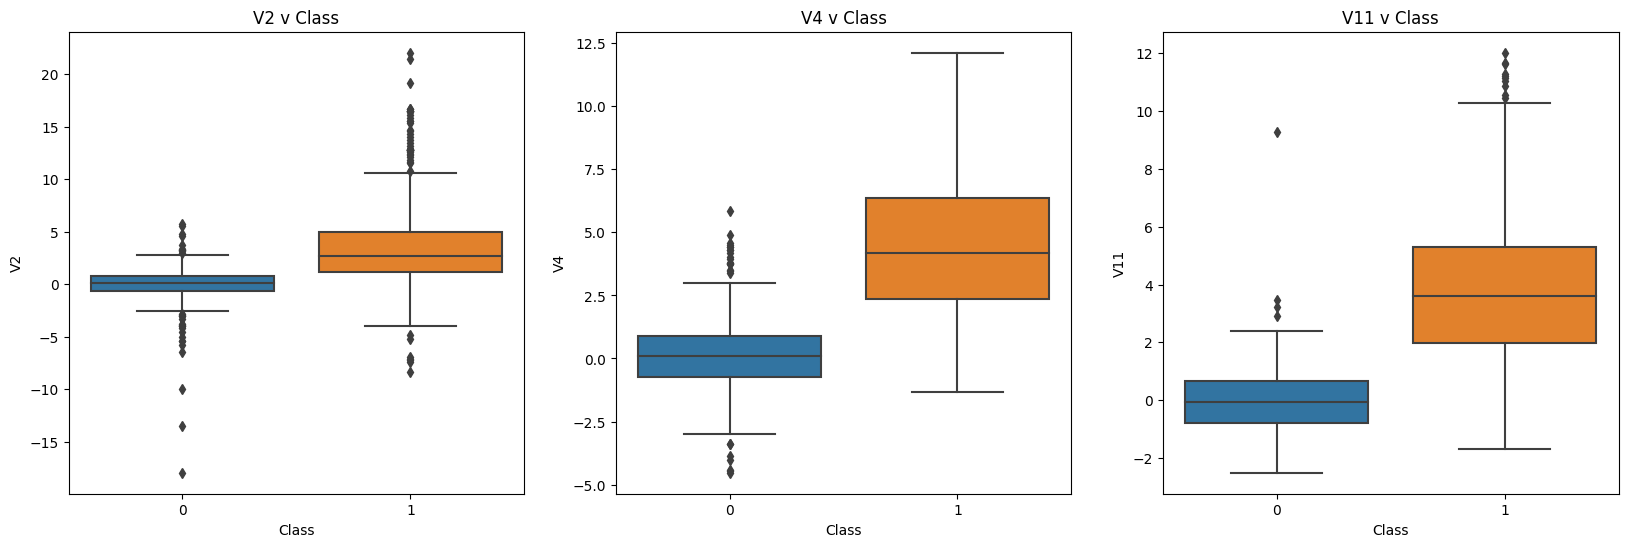

In [67]:
#Figure and number of slots
fig, axes = plt.subplots(ncols=3, figsize=(20,6))

#V2 boxplot
sns.boxplot(x="Class", y="V2", data=df_balanced_shuffled, ax=axes[0])
axes[0].set_title("V2 v Class")

#V4 boxplot
sns.boxplot(x="Class", y="V4", data=df_balanced_shuffled, ax=axes[1])
axes[1].set_title("V4 v Class")

#V11 boxplot
sns.boxplot(x="Class", y="V11", data=df_balanced_shuffled, ax=axes[2])
axes[2].set_title("V11 v Class")

#showing figure
plt.show()

Above you can see the outliers above adn below the quartile ranges. Now we must consider purging these outliers.

c:\Users\andre\Documents\WGU\Capstone\Task 2\jupyter_application\C964-CS-Capstone-2\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\andre\Documents\WGU\Capstone\Task 2\jupyter_application\C964-CS-Capstone-2\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\andre\Documents\WGU\Capstone\Task 2\jupyter_application\C964-CS-Capstone-2\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\andre\Documents\WGU\Capstone\Task 2\jupyter_application\C964-CS-Capstone-2\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


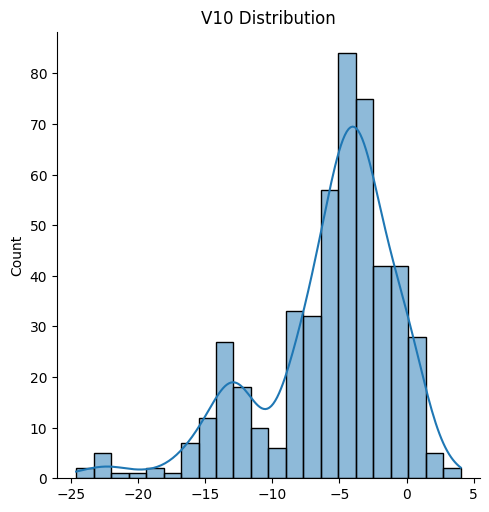

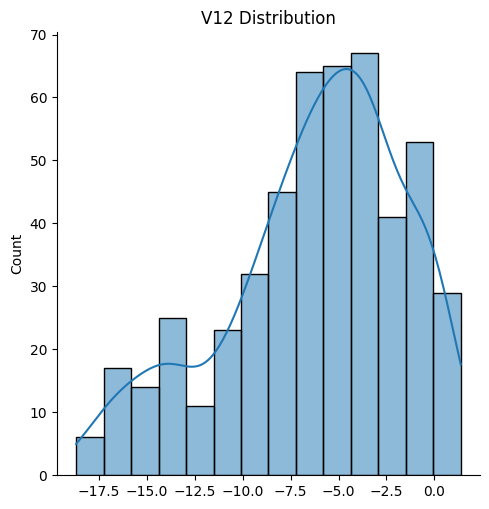

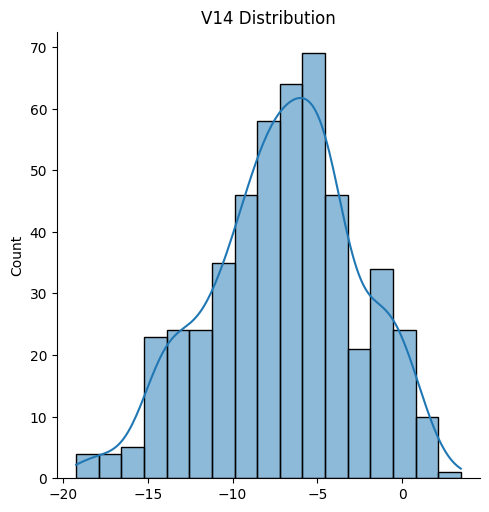

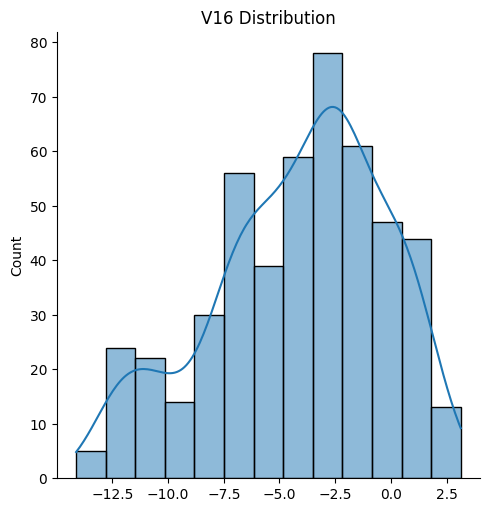

In [68]:
#Values of different negative correlation features where fraud occurs
v10_dist = df_balanced_shuffled["V10"].loc[df_balanced_shuffled["Class"] == 1].values
v12_dist = df_balanced_shuffled["V12"].loc[df_balanced_shuffled["Class"] == 1].values
v14_dist = df_balanced_shuffled["V14"].loc[df_balanced_shuffled["Class"] == 1].values
v16_dist = df_balanced_shuffled["V16"].loc[df_balanced_shuffled["Class"] == 1].values

#set plots
sns.displot(v10_dist, kde=True).set(title="V10 Distribution")

sns.displot(v12_dist, kde=True).set(title="V12 Distribution")

sns.displot(v14_dist, kde=True).set(title="V14 Distribution")

sns.displot(v16_dist, kde=True).set(title="V16 Distribution")


c:\Users\andre\Documents\WGU\Capstone\Task 2\jupyter_application\C964-CS-Capstone-2\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\andre\Documents\WGU\Capstone\Task 2\jupyter_application\C964-CS-Capstone-2\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\andre\Documents\WGU\Capstone\Task 2\jupyter_application\C964-CS-Capstone-2\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


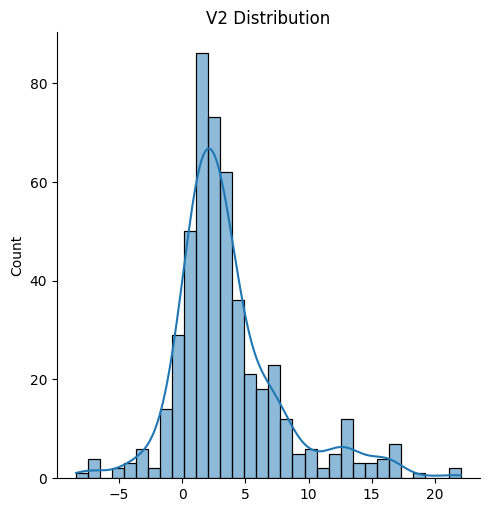

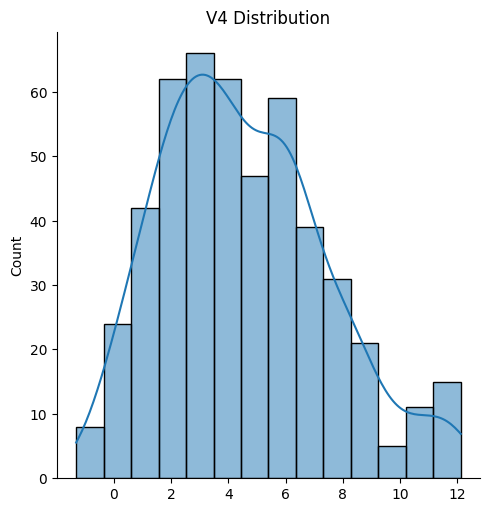

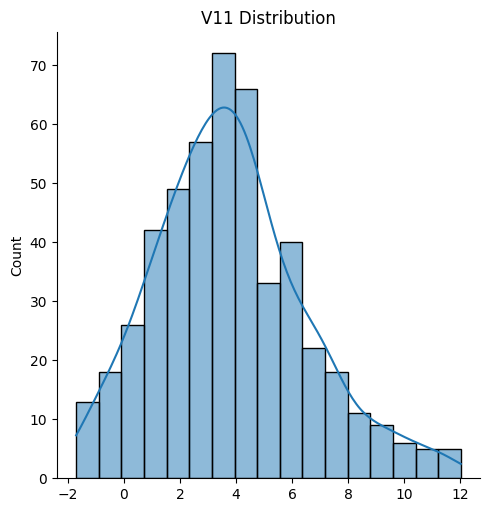

In [69]:
#Values of different negative correlation features where fraud occurs
v2_dist = df_balanced_shuffled["V2"].loc[df_balanced_shuffled["Class"] == 1].values
v4_dist = df_balanced_shuffled["V4"].loc[df_balanced_shuffled["Class"] == 1].values
v11_dist = df_balanced_shuffled["V11"].loc[df_balanced_shuffled["Class"] == 1].values

#set plots
sns.displot(v2_dist, kde=True).set(title="V2 Distribution")

sns.displot(v4_dist, kde=True).set(title="V4 Distribution")

sns.displot(v11_dist, kde=True).set(title="V11 Distribution")


Based on review of distributions compared to a normal distribution. I have determined that anomolies are not extreme.

In [70]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

x = df_balanced_shuffled.drop("Class", axis=1)
y = df_balanced_shuffled["Class"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3,random_state=67)

x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

from sklearn.model_selection import GridSearchCV

parameters = {
    'C': [.001, .01, .1, 1, 10, 100],
    "penalty": ['l2']
}

logistic_regresion_model = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(logistic_regresion_model, parameters,scoring='accuracy')
grid_search.fit(x_train, y_train)

optimized_logistic_regression_model = grid_search.best_estimator_

print(f'{round(optimized_logistic_regression_model.score(x_test, y_test),4)*100}%')


90.53999999999999%


Training score based on balanced data is the one above. Predicting the data using entirety of the dataset. Next finding the optimal parameters is necessary. 


In [71]:
X = df.drop("Class", axis=1)
Y = df["Class"]
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X,Y,train_size=.4, random_state=98)

### Confusion Matrix
This Confusion Matrix is used to demonstrate actual transactions, actual fraud, false fraud, false transactions. This gives use an idea how the model classifies and if there is any overfitting.

c:\Users\andre\Documents\WGU\Capstone\Task 2\jupyter_application\C964-CS-Capstone-2\venv\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


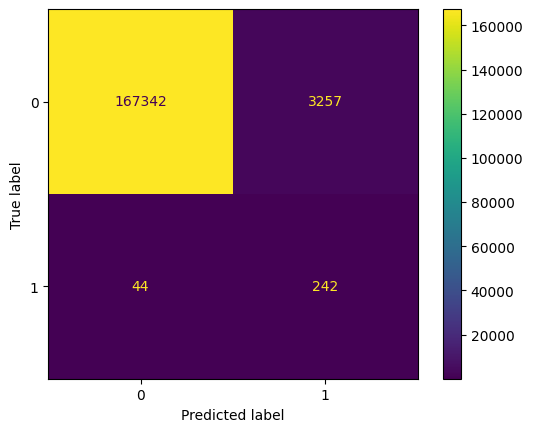

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
Y_PRED = optimized_logistic_regression_model.predict(X_TEST)

confus_matrix = confusion_matrix(y_true=Y_TEST, y_pred=Y_PRED)

dis = ConfusionMatrixDisplay(confus_matrix)
dis.plot()

The model predictions compared to actual values:

167342 of non-fraudulent transactions predicted correctly
44 cases were predicted as non-fraudulent but were fraudlent 
3257 cases were predicted as fraudulent but were non-fraudulent
242 cases were predicted and confirmed as fraudlent. 

In this use case having false postives is better than having false negatives. Having false postiives leaves it up to human review, while false negative allow for fraud to hide itself amongst non-fraudulent charges.
## Ouptutting Model
Below is the codeblock dedicated to outputting the model for future implemntation in an application.

In [76]:
import joblib

name = "LogisticRegressionModel.joblib"
joblib.dump(optimized_logistic_regression_model, filename=name)

['LogisticRegressionModel.joblib']